In [ ]:
!pip install control

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control
import warnings
warnings.filterwarnings("ignore")
import math

In [ ]:
A = np.array([[-1/2, 0, -1/2], [0, 0, -1/2], [1, 1, 0]]) # C=1, R=1, L=2
B = np.array([[0], [1/2], [0]]) # segunda saída do sistema da atividade anterior
C = np.array([[0, 0, 1]])
D = np.array([0])

P = np.array([-3+1j*math.sqrt(3), -3-1j*math.sqrt(3), -1, -1]) #Polos

In [ ]:
N = A.shape[0]+1
N

4

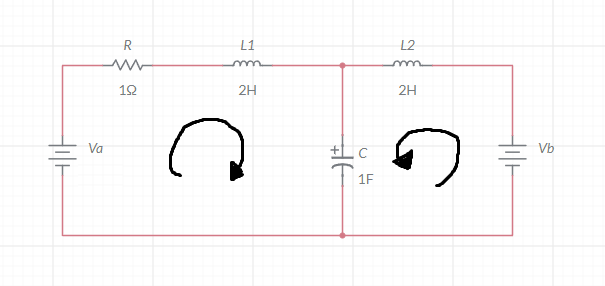

Precisamos calcular as matrizes $\hat{A}$ e $\hat{B}$, portanto utilizamos as matrizes $A$ e $B$ da atividade anterior utilizando a entrada Vb da atividade anterior e obtemos as matrizes do seguinte modo:

\begin{align}
  \hat{A} =
  \begin{bmatrix}
    A&0\\
    -C&0\\
    \end{bmatrix}
\end{align}

\begin{align}
  \hat{B} =
  \begin{bmatrix}
    B\\
    0\\
    \end{bmatrix}
\end{align}

In [ ]:
A_c = np.c_[np.r_[A, -C], np.zeros(N)]#Calculando a Matriz A_^
A_c

array([[-0.5,  0. , -0.5,  0. ],
       [ 0. ,  0. , -0.5,  0. ],
       [ 1. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. , -1. ,  0. ]])

In [ ]:
B_c = np.r_[B, np.array([[0]])] #Calculando a Matriz B_^
B_c

array([[0. ],
       [0.5],
       [0. ],
       [0. ]])

Então, a partir das matrizes $\hat{A}$ e $\hat{B}$, e por meio da função Acker obtemos o vetor de ganho $\hat{K}$.

In [ ]:
K_c = control.acker(A_c, B_c, P) #Calculando o vetor de ganho K_^
K_c = np.array(K_c)
K_c

array([[ 32.5,  15. ,  40.5, -48. ]])

Sabendo que $\hat{K}$ é: $\hat{K} = [K | -k_{I}]$ separando o vetor $K$ e o ganho do integrador $k_{I}$, temos:

In [ ]:
K = np.array([K_c[0][:N-1]]) #Separando vetor de ganho K
print(K)

Ki = -1*np.array(K_c)[0][N-1] #Constante de ganho K_i
print(Ki)

[[32.5 15.  40.5]]
48.0


In [ ]:
A-B@K # Observando a matriz...

array([[ -0.5 ,   0.  ,  -0.5 ],
       [-16.25,  -7.5 , -20.75],
       [  1.  ,   1.  ,   0.  ]])

Calculando agora as matrizes $AA$, $BB$, $CC$ e $DD$ como demonstrado abaixo:

\begin{align}
  AA =
  \begin{bmatrix}
    A-BK&Bk_{I}\\
    -C&0\\
    \end{bmatrix}
\end{align}

\begin{align}
  BB =
  \begin{bmatrix}
    0\\
    1\\
    \end{bmatrix}
\end{align}

\begin{align}
  CC =
  \begin{bmatrix}
    C&0\\
    \end{bmatrix}
\end{align}

\begin{align}
  DD =
  \begin{bmatrix}
    0\\
    \end{bmatrix}
\end{align}

In [ ]:
Aa = np.c_[np.r_[A-B@K, -C], np.r_[B*Ki, np.array([[0]])]] #Calculando AA
Bb = np.r_[np.zeros(( B.shape[0], 1 )), np.array([[1]])] #Calculando BB
Cc = np.c_[C, np.array([[0]])] #Calculando CC
Dd = np.array([[0]]) #Calculando DD

Transformando as matrizes em um sistema para aplicar a resposta ao degrau e obtermos o gráfico

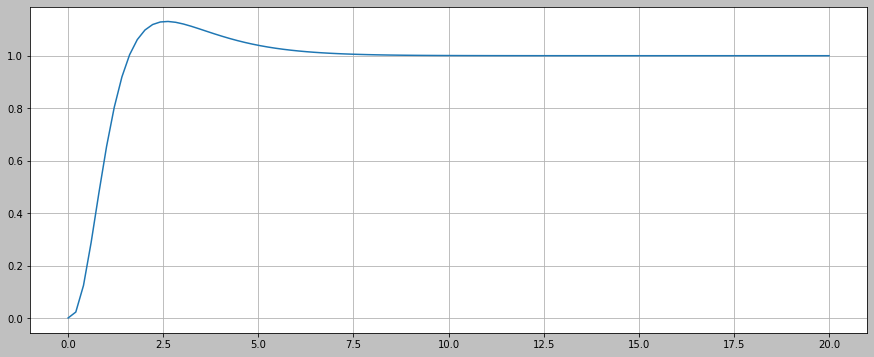

In [ ]:
system = control.StateSpace(Aa, Bb, Cc, Dd)
x, y = control.step_response(system, np.linspace(0,20,100)) #Resposta ao degrau

plt.figure(figsize=(15, 6), facecolor = "silver")
plt.grid() #plotando
plt.plot(x, y)